In [1]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diab_df = pd.read_csv("diabetes.csv")

In [4]:
diab_df.head()
#target - outcome
#numerical - all rest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Pregnancies', ylabel='count'>

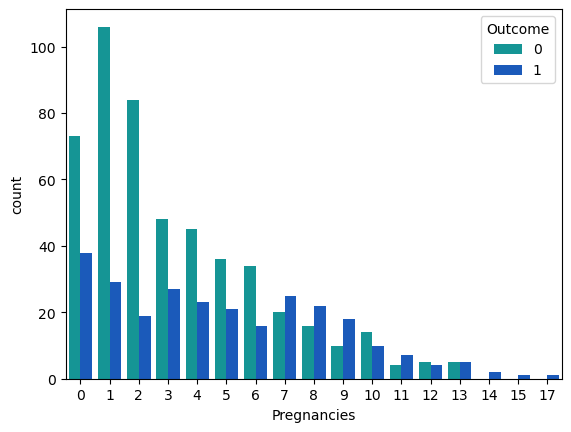

In [14]:
#data visualization
sns.countplot(x="Pregnancies",data=diab_df,hue="Outcome",palette="winter_r")
#more class 1 outcomes for 7,8,9 pregnancies
#more class 0 outcomes for 0,1,2 pregnancies

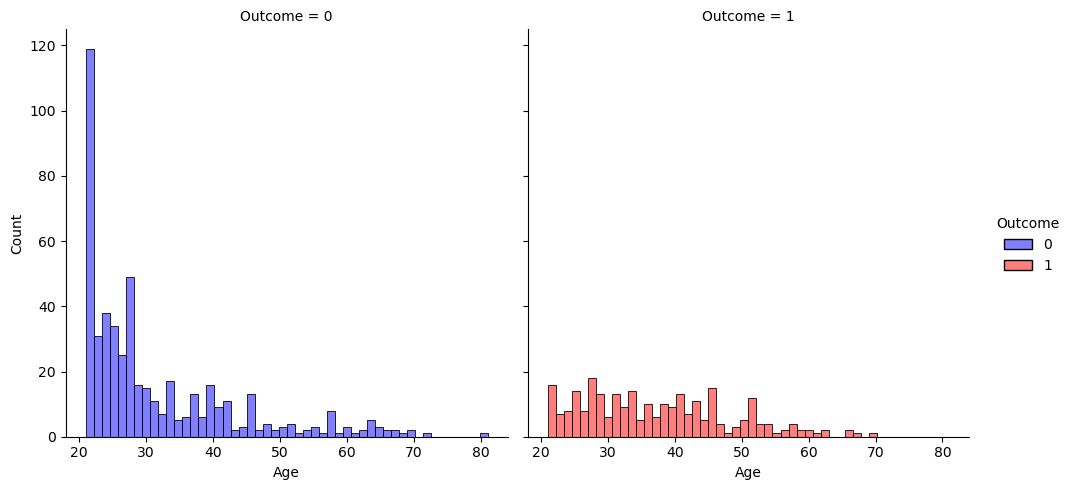

In [25]:
#age 
facet_kws = {"hue": "Outcome", "palette": {0: "blue", 1: "red"}}
sns.displot(x="Age",col="Outcome",data=diab_df,alpha=0.5,**facet_kws,bins=50)
#younger people in class 0 outcome

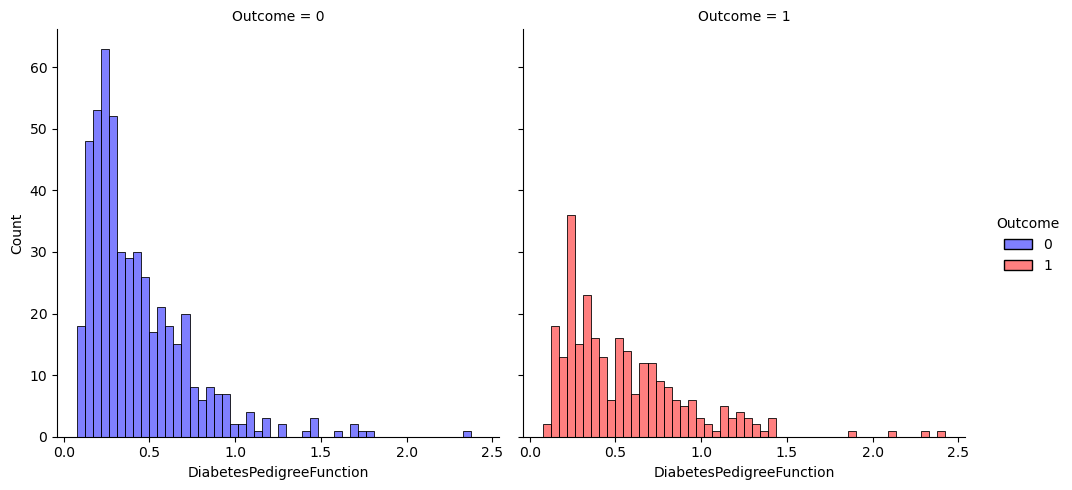

In [24]:
facet_kws = {"hue": "Outcome", "palette": {0: "blue", 1: "red"}}
sns.displot(x="DiabetesPedigreeFunction",data=diab_df,col="Outcome",alpha=0.5,**facet_kws,bins=50)
#lower DiabetesPedigreeFunction is more in class 0 

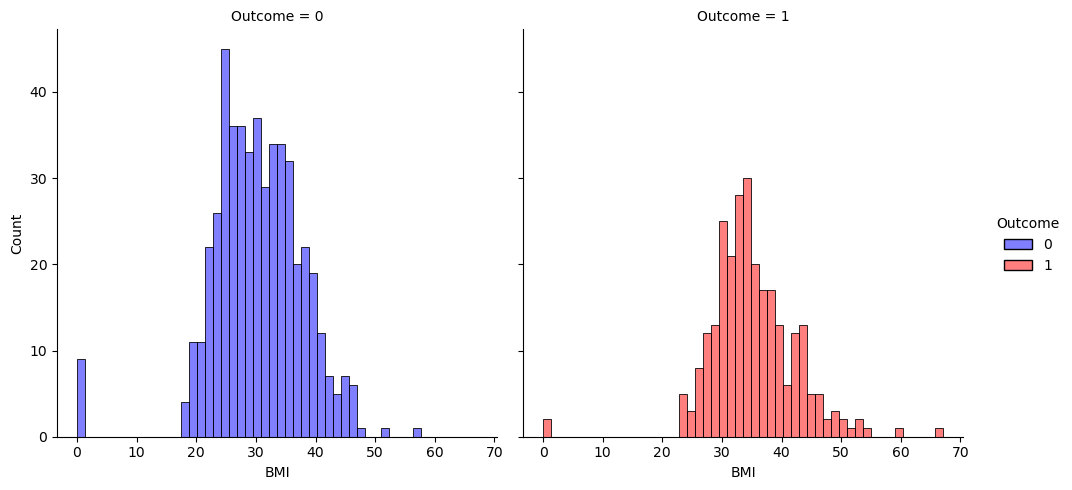

In [28]:
facet_kws = {"hue": "Outcome", "palette": {0: "blue", 1: "red"}}
sns.displot(x="BMI",data=diab_df,col="Outcome",alpha=0.5,**facet_kws,bins=50)
#more or less even distribution,but class 1 has a higher end of BMI

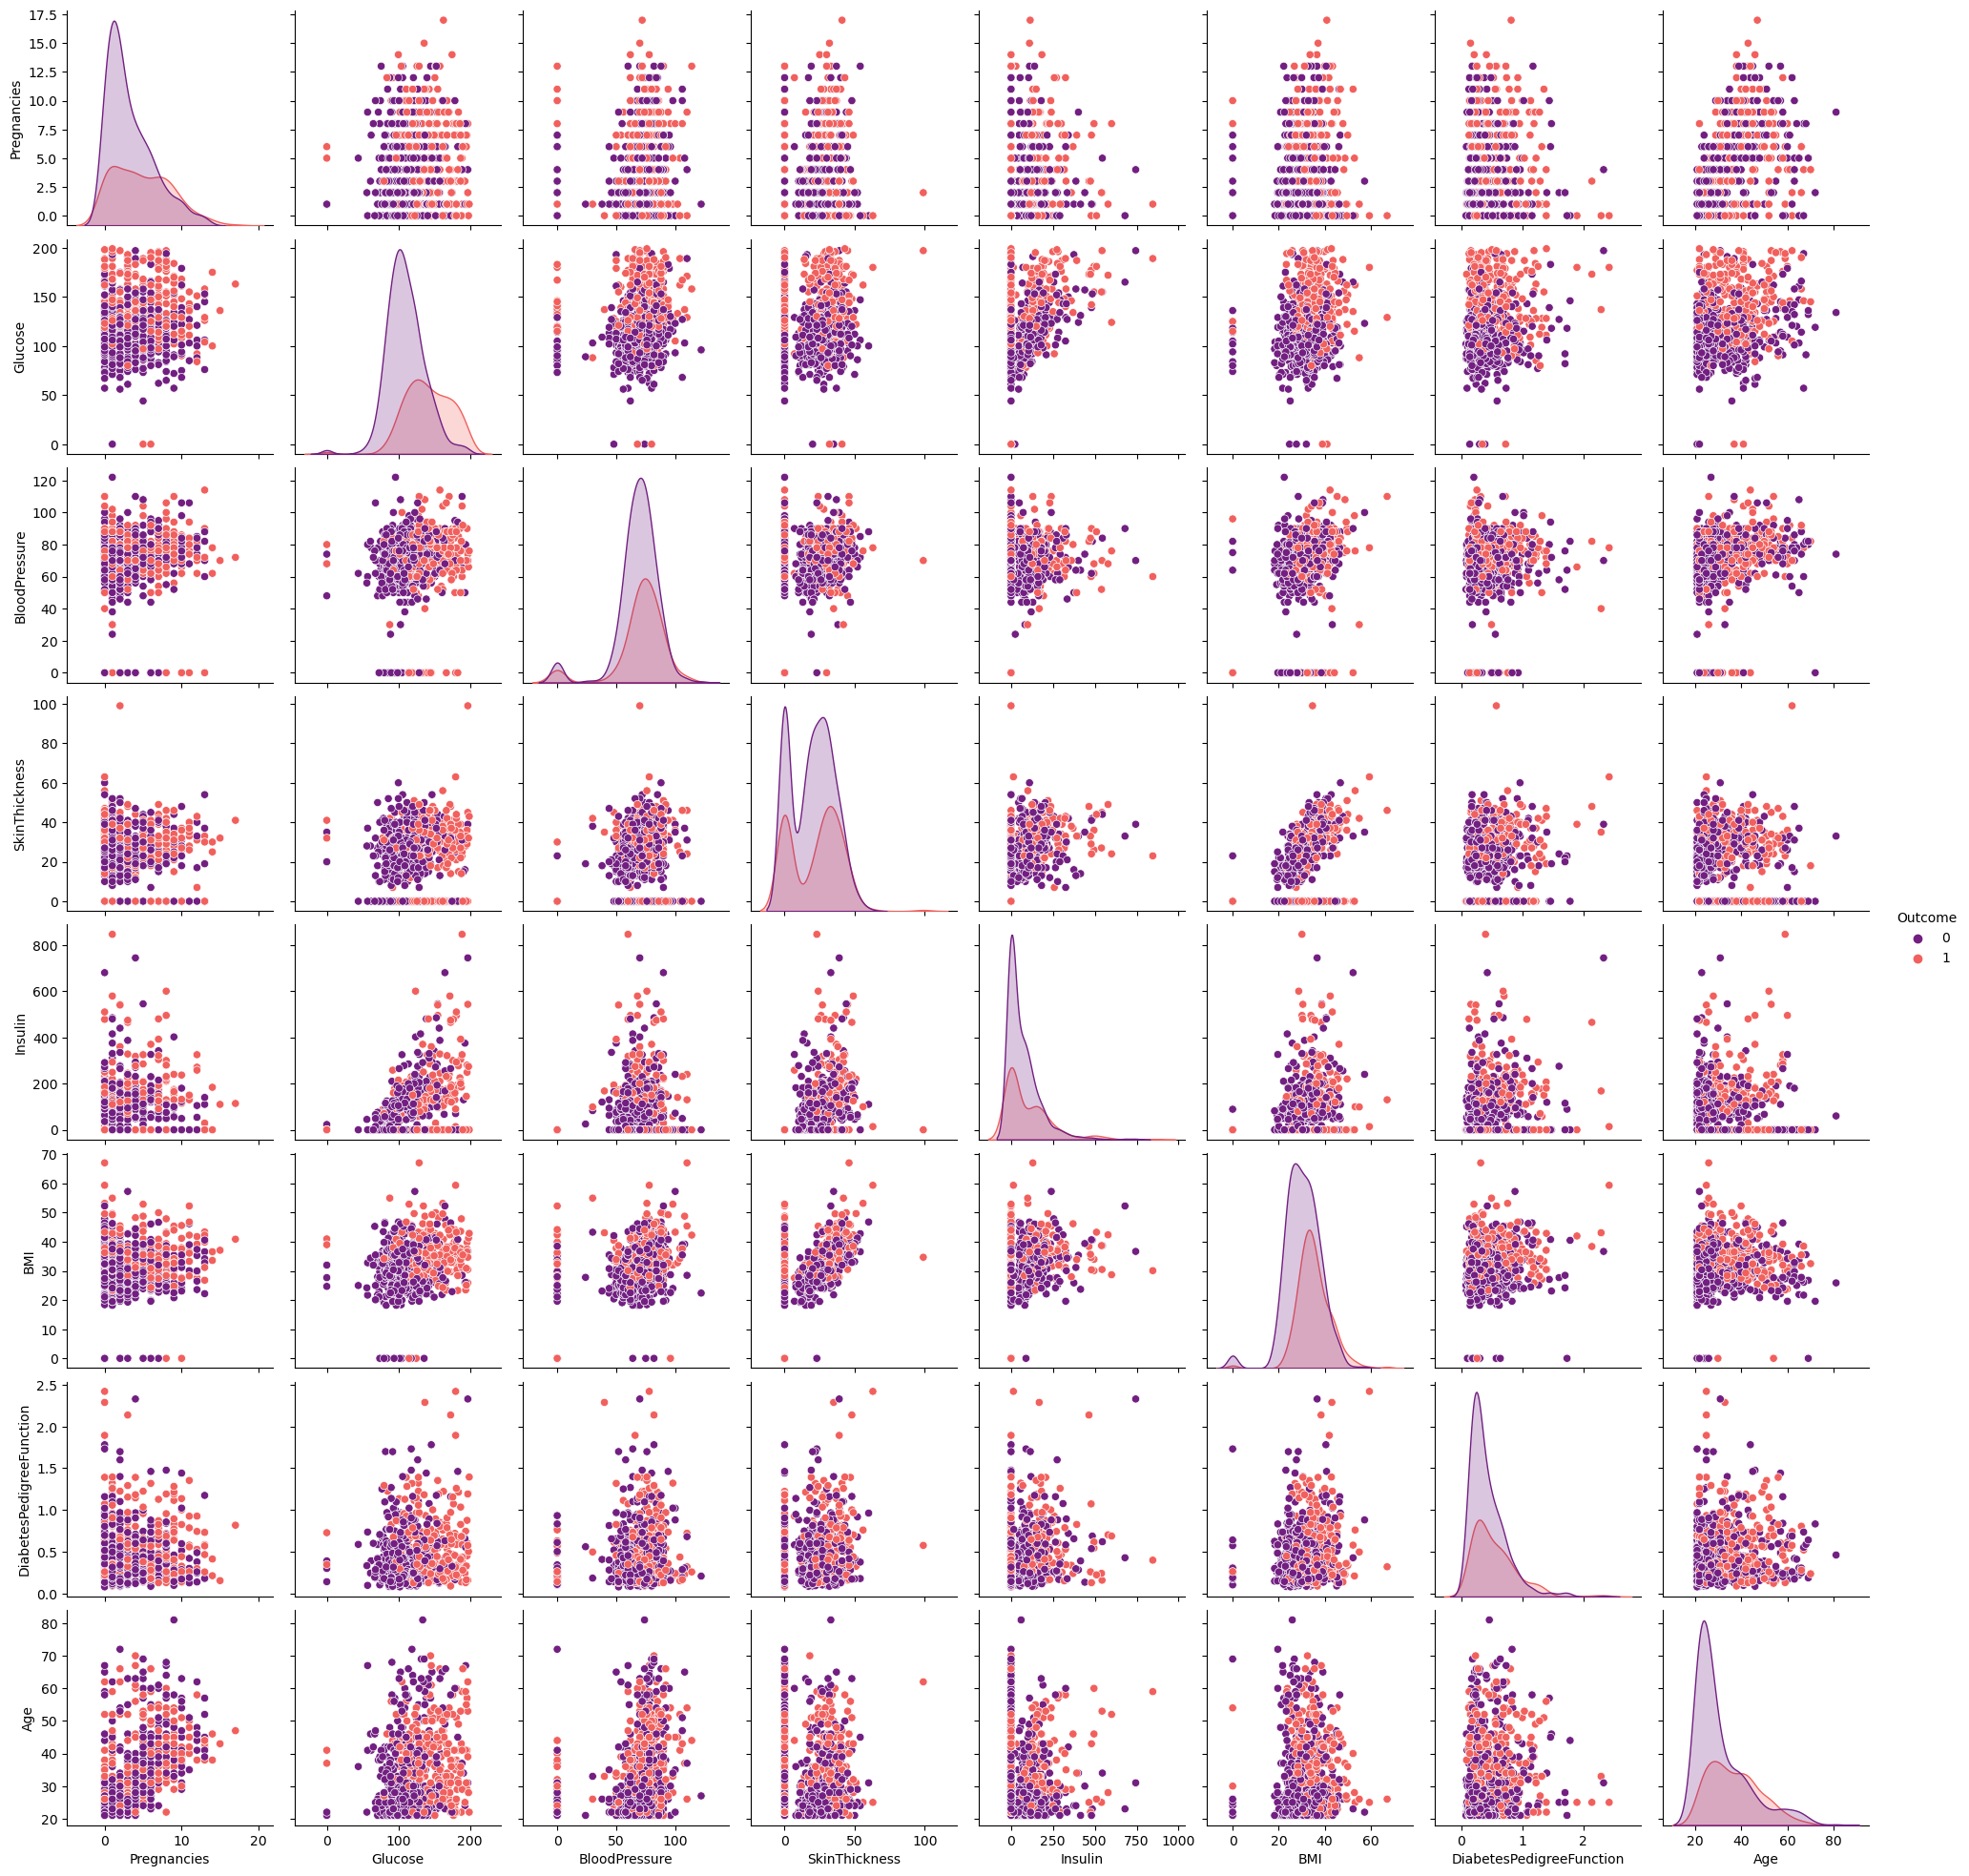

In [30]:
sns.pairplot(diab_df,hue="Outcome",palette="magma")

In [32]:
#data split
X = diab_df.drop("Outcome",axis=1)
y = diab_df["Outcome"]

In [33]:
#data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [34]:
#model-1 Decsiontree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [35]:
#training model - 1
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
#testing
predictions_dtree = dtree.predict(X_test)

In [38]:
#metrics on model - 1
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,predictions_dtree))
print(confusion_matrix(y_test,predictions_dtree))
#recall must be high because false negatives must be avoided in this context

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       158
           1       0.50      0.49      0.50        73

    accuracy                           0.68       231
   macro avg       0.63      0.63      0.63       231
weighted avg       0.68      0.68      0.68       231

[[122  36]
 [ 37  36]]


In [39]:
#model - 2 RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)

In [40]:
#model - 2 trainig
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [41]:
#model - 2 testing
predictions_rfc = rfc.predict(X_test)

In [42]:
#model - 2 metrics
print(classification_report(y_test,predictions_rfc))
print(confusion_matrix(y_test,predictions_rfc))
#better recall and less false negatives

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       158
           1       0.68      0.66      0.67        73

    accuracy                           0.79       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.79      0.79      0.79       231

[[135  23]
 [ 25  48]]


In [44]:
#model - 3 KNN
from sklearn.neighbors import KNeighborsClassifier
#setting initial value of k as 1
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
#model - 3 training
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
#model - 3 testing
predictions_knn = knn.predict(X_test)

In [47]:
# intial metrics
print(classification_report(y_test,predictions_knn))
print(confusion_matrix(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       158
           1       0.47      0.58      0.52        73

    accuracy                           0.66       231
   macro avg       0.62      0.64      0.63       231
weighted avg       0.68      0.66      0.67       231

[[110  48]
 [ 31  42]]


In [48]:
err_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_knn = knn.predict(X_test)
    err_rate.append(np.mean(y_test!=predictions_knn))

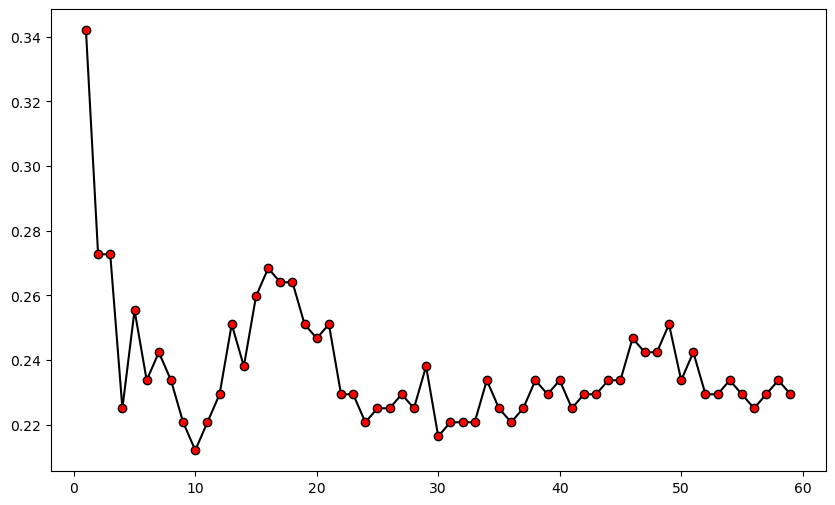

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),err_rate,linestyle="-",markerfacecolor="red",marker="o",color="black")

In [53]:
#min error rate at k=10
#final model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
#testing 
predictions_knn_10 = knn.predict(X_test)

In [57]:
#final metrics 
print(classification_report(y_test,predictions_knn_10))
print(confusion_matrix(y_test,predictions_knn_10))
#best metrics are found for random forest classifier

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       158
           1       0.69      0.60      0.64        73

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231

[[138  20]
 [ 29  44]]
